In [2]:
import pandas as pd
import numpy as np
import requests
from requests import get
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup # for web scraping
import seaborn as sns # for beautiful graphs
import scipy.stats as stats # to calculate r^2 for linear regressions
from scipy.stats import powerlaw # for plotting linear regressions
import statsmodels as sm
import matplotlib.ticker as mtick
sns.set()

In [3]:
#opening the data
data= pd.read_csv('/Users/Mariam/Desktop/chicago-food-inspections/food-inspections.csv',delimiter=',')

# drop all the empty columns
data.drop(['Historical Wards 2003-2015', 'Zip Codes', 'Community Areas','Census Tracts','Wards'], axis=1,inplace=True)

#show the dataframe
display(data.head(3))

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2320315,SERENDIPITY CHILDCARE,SERENDIPITY CHILDCARE,2216009.0,Daycare Above and Under 2 Years,Risk 1 (High),1300 W 99TH ST,CHICAGO,IL,60643.0,2019-10-23T00:00:00.000,License Re-Inspection,Pass,NaN,41.714168,-87.655291,"{'longitude': '41.7141680989703', 'latitude': ..."
1,2320342,YOLK TEST KITCHEN,YOLK TEST KITCHEN,2589655.0,Restaurant,Risk 1 (High),1767 N MILWAUKEE AVE,CHICAGO,IL,60647.0,2019-10-23T00:00:00.000,Canvass,Pass w/ Conditions,23. PROPER DATE MARKING AND DISPOSITION - Comm...,41.913588,-87.682203,"{'longitude': '41.9135877900482', 'latitude': ..."
2,2320328,LAS ASADAS MEXICAN GRILL,LAS ASADAS MEXICAN GRILL,2583309.0,Restaurant,Risk 1 (High),3834 W 47TH ST,CHICAGO,IL,60632.0,2019-10-23T00:00:00.000,Canvass,Out of Business,NaN,41.808025,-87.720037,"{'longitude': '41.80802515275297', 'latitude':..."


In [4]:
#creating a copy with selected columns in order to do basic exploration ( we don't need all the original dataframe columns)
data_selected = data.filter(['Inspection ID','Risk','Results'], axis=1)
display(data_selected.head(3))

,Inspection ID,Risk,Results
0,2320315,Risk 1 (High),Pass
1,2320342,Risk 1 (High),Pass w/ Conditions
2,2320328,Risk 1 (High),Out of Business


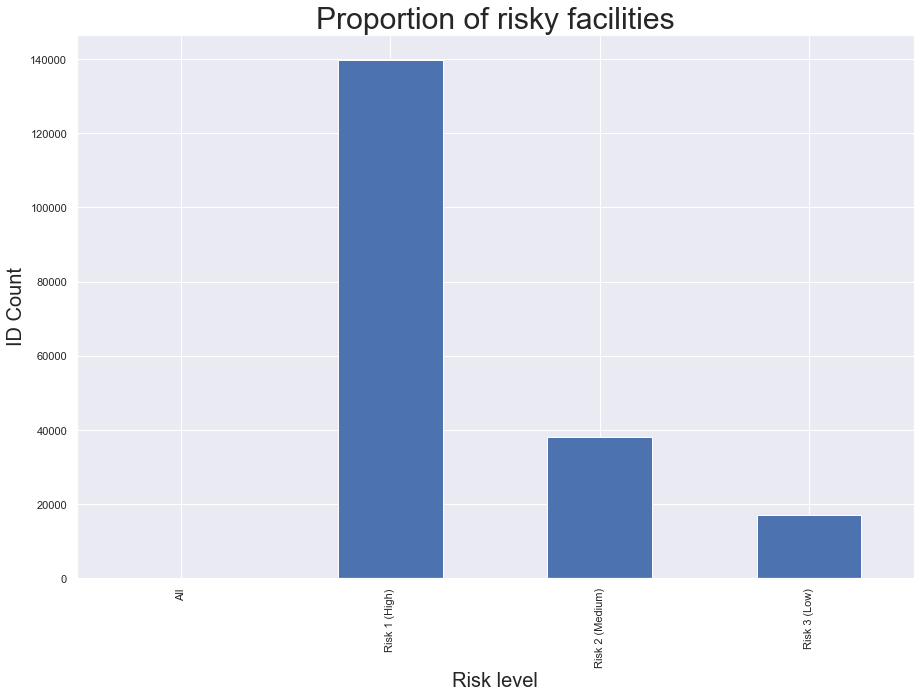

In [5]:
#group by risk in order to evaluate the proportion of risky facilities
data_grouped_by_risk=data_selected.groupby('Risk').count()


#plotting the number of risky restaurant
ID_risky_plot = data_grouped_by_risk['Inspection ID'].plot( kind = 'bar', figsize = (15,10))
plt.title('Proportion of risky facilities', size=30)
plt.xlabel('Risk level', size=20)
plt.ylabel('ID Count', size=20);


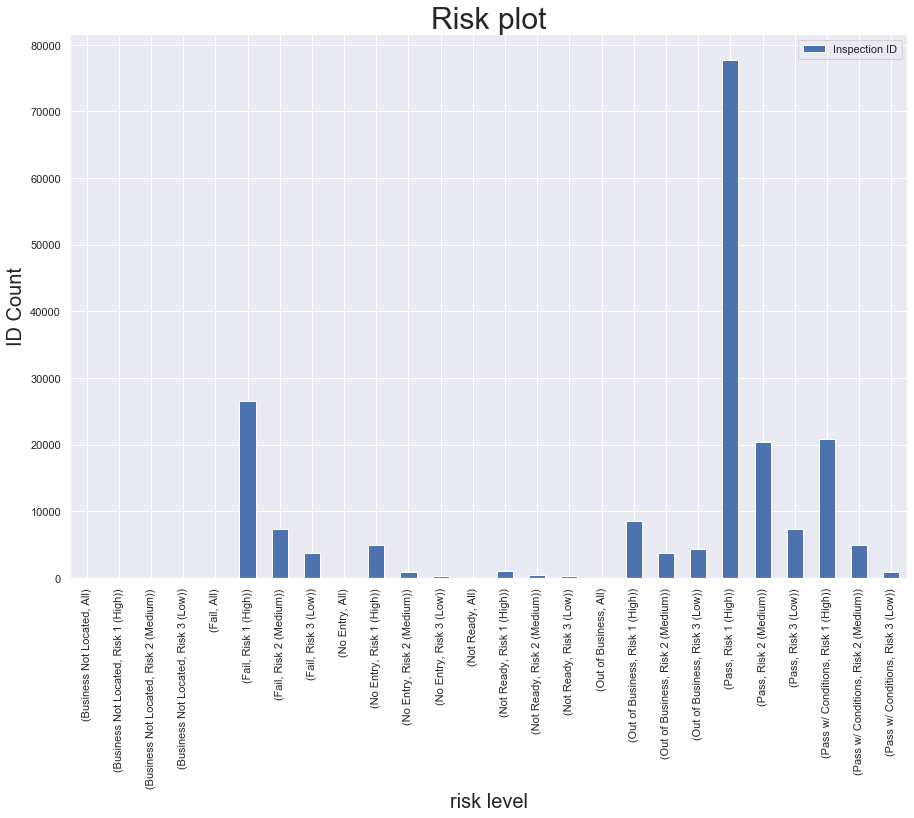

In [6]:
#groupy by Results and Risk
Relation_Risk_Results=data_selected.groupby(['Results','Risk']).count()


#plotting the number of risky restaurant
Relation_plot = Relation_Risk_Results.plot( kind = 'bar', figsize = (15,10))

#Labels ( need to change the labels of the x_axis and the legend)
plt.title('Risk plot', size=30)
plt.xlabel('risk level', size=20)
plt.ylabel('ID Count', size=20);

In [7]:
#groupby results in order to have all the kind of possible results
data_grouped_by_results=data_selected.groupby('Results')
display(data_grouped_by_results.first())
display(data_grouped_by_results.count())

,Inspection ID,Risk
Results,,
Business Not Located,2286168,Risk 1 (High)
Fail,2320293,Risk 1 (High)
No Entry,2316190,Risk 1 (High)
Not Ready,2316086,Risk 3 (Low)
Out of Business,2320328,Risk 1 (High)
Pass,2320315,Risk 1 (High)
Pass w/ Conditions,2320342,Risk 1 (High)


,Inspection ID,Risk
Results,,
Business Not Located,67,59
Fail,37675,37653
No Entry,6184,6177
Not Ready,1854,1834
Out of Business,16786,16783
Pass,105504,105492
Pass w/ Conditions,26744,26744


In [8]:
#We need to plot the proportions of risk per results in order to see is there is a correlation 
#number of inspections per facility

In [9]:
#groupeby the facility brand
data_groupedby_facility=data['AKA Name'].groupby([data['Address'],data['AKA Name']])
#count the number of data giver per facility = number of inspections and creating a data frame 
count_inspections=pd.DataFrame(data_groupedby_facility.count().sort_values(ascending=False)).rename(columns = {'AKA Name':'Number_of_inspections'})
display(count_inspections.head(3))


,,Number_of_inspections
Address,AKA Name,
6900 S LAFAYETTE AVE,MCDONALD'S,58
4171 S ARCHER AVE,LA MEXICANA TAMALE CART,51
2637 S THROOP ST,"TRIPLE A SERVICES, INC.",50


In [10]:
#check MCDONALD'S CASE
high_inspections_number= data.loc[data['AKA Name']== ("MCDONALD'S")]
high_inspections_number =data.loc[data['Address'].str.contains("6900 S LAFAYETTE AVE")]
high_inspections_number

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
5218,2293989,MCDONALD'S #6113,MCDONALD'S,2551022.0,Restaurant,Risk 2 (Medium),6900 S LAFAYETTE AVE,CHICAGO,IL,60621.0,2019-06-21T00:00:00.000,Short Form Complaint,Pass,NaN,41.769155,-87.626813,"{'longitude': '41.76915533533597', 'latitude':..."
9640,2282501,MCDONALD'S #6113,MCDONALD'S,2551022.0,Restaurant,Risk 2 (Medium),6900 S LAFAYETTE AVE,CHICAGO,IL,60621.0,2019-04-03T00:00:00.000,Complaint,Pass,51. PLUMBING INSTALLED; PROPER BACKFLOW DEVICE...,41.769155,-87.626813,"{'longitude': '41.76915533533597', 'latitude':..."
17972,2223123,MCDONALD'S #6113,MCDONALD'S,2551022.0,Restaurant,Risk 2 (Medium),6900 S LAFAYETTE AVE,CHICAGO,IL,60621.0,2018-09-28T00:00:00.000,Complaint Re-Inspection,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.769155,-87.626813,"{'longitude': '41.76915533533597', 'latitude':..."
18569,2222552,MCDONALD'S #6113,MCDONALD'S,2551022.0,Restaurant,Risk 2 (Medium),6900 S LAFAYETTE AVE,CHICAGO,IL,60621.0,2018-09-19T00:00:00.000,Complaint,Fail,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.769155,-87.626813,"{'longitude': '41.76915533533597', 'latitude':..."
25668,2166450,MCDONALD'S #6113,MCDONALD'S,2551022.0,Restaurant,Risk 2 (Medium),6900 S LAFAYETTE AVE,CHICAGO,IL,60621.0,2018-04-20T00:00:00.000,Complaint Re-Inspection,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.769155,-87.626813,"{'longitude': '41.76915533533597', 'latitude':..."
26123,2159975,MCDONALD'S #6113,MCDONALD'S,2551022.0,Restaurant,Risk 2 (Medium),6900 S LAFAYETTE AVE,CHICAGO,IL,60621.0,2018-04-12T00:00:00.000,Short Form Complaint,Fail,19. OUTSIDE GARBAGE WASTE GREASE AND STORAGE A...,41.769155,-87.626813,"{'longitude': '41.76915533533597', 'latitude':..."
27646,2150495,MCDONALD'S #6113,MCDONALD'S,2551022.0,Restaurant,Risk 2 (Medium),6900 S LAFAYETTE AVE,CHICAGO,IL,60621.0,2018-03-15T00:00:00.000,Complaint Re-Inspection,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.769155,-87.626813,"{'longitude': '41.76915533533597', 'latitude':..."
28014,2146116,MCDONALD'S #6113,MCDONALD'S,2551022.0,Restaurant,Risk 2 (Medium),6900 S LAFAYETTE AVE,CHICAGO,IL,60621.0,2018-03-08T00:00:00.000,Complaint,Fail,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.769155,-87.626813,"{'longitude': '41.76915533533597', 'latitude':..."
33917,2104339,MCDONALD'S #6113,MCDONALD'S,2551022.0,Restaurant,Risk 2 (Medium),6900 S LAFAYETTE AVE,CHICAGO,IL,60621.0,2017-11-08T00:00:00.000,Short Form Complaint,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.769155,-87.626813,"{'longitude': '41.76915533533597', 'latitude':..."
35251,2099162,MCDONALD'S #6113,MCDONALD'S,2551022.0,Restaurant,Risk 2 (Medium),6900 S LAFAYETTE AVE,CHICAGO,IL,60621.0,2017-10-19T00:00:00.000,Short Form Complaint,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.769155,-87.626813,"{'longitude': '41.76915533533597', 'latitude':..."


In [14]:
#Check the meaning of a license# = 0.0
nul_license= data.loc[data['License #'].astype(str)== ('0.0')]
#no specific meaning -> more research to know what is the meaning of a license
display(nul_license.head(3))
nul_license.size


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
378,2315561,DORE EARLY CHILDHOOD CENTER,DORE EARLY CHILDHOOD CENTER,0.0,School,Risk 1 (High),6108 S Natoma AVE,CHICAGO,IL,60638.0,2019-10-09T00:00:00.000,Canvass,Pass,NaN,41.780927,-87.787640,"{'longitude': '41.78092716332793', 'latitude':..."
718,2313166,EL COSTENO,EL COSTENO,0.0,Mobile Food Preparer,Risk 1 (High),235 W 87TH ST,CHICAGO,IL,60620.0,2019-10-01T00:00:00.000,Complaint,Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",41.735933,-87.629878,"{'longitude': '41.73593344061027', 'latitude':..."
783,2313036,TAFT FRESHMAN ACADEMY,TAFT FRESHMAN ACADEMY,0.0,School,Risk 1 (High),4071 N OAK PARK AVE BSMT,CHICAGO,IL,60634.0,2019-09-27T00:00:00.000,Canvass,Pass,52. SEWAGE & WASTE WATER PROPERLY DISPOSED - C...,41.954631,-87.796455,"{'longitude': '41.95463092640079', 'latitude':..."


8738

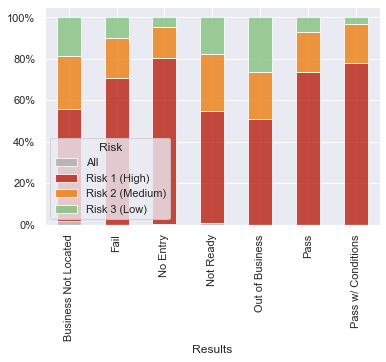

In [144]:
#trying to look is there a link between the risk and the inspections results ( do we need to keep only : pass , pass with cond , fail ?)

#creating a palette of colors 
pal = ["#AFAFAF", "#B82010", "#ED7F10", "#85C17E"]


data.groupby(['Results','Risk']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True, colors=pal, alpha=0.8)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [134]:
#What is the meaning of 'all' for the risk ?
risk_all= data.loc[data['Risk']== 'All']
risk_all


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
376,2315596,TWO HEARTED QUEEN,TWO HEARTED QUEEN,2694759.0,Restaurant,All,3500 N HALSTED ST,CHICAGO,IL,60657.0,2019-10-09T00:00:00.000,License,Not Ready,NaN,41.945504,-87.649579,"{'longitude': '41.94550365331064', 'latitude':..."
593,2315299,KILWINS ICE CREAM AND CHOCOLATE,KILWINS ICE CREAM AND CHOCOLATE,2694404.0,NaN,All,3519 N CLARK ST,CHICAGO,IL,60657.0,2019-10-03T00:00:00.000,License,Not Ready,NaN,41.946281,-87.655603,"{'longitude': '41.94628081101039', 'latitude':..."
1085,2312632,SUPERMERCADO EL PARAISO INC.,SUPERMERCADO EL PARAISO INC.,2670414.0,Grocery Store,All,4301 S ARCHER AVE,CHICAGO,IL,60632.0,2019-09-20T00:00:00.000,Canvass,Out of Business,NaN,41.815301,-87.702042,"{'longitude': '41.81530069366088', 'latitude':..."
1353,2312348,KHEPRI CAFE,KHEPRI CAFE,2683983.0,NaN,All,4650 N KEDZIE AVE,CHICAGO,IL,60625.0,2019-09-16T00:00:00.000,License,Not Ready,NaN,41.966062,-87.708548,"{'longitude': '41.966061791348025', 'latitude'..."
1401,2312291,J.T.'S GENUINE SANDWICH,J.T.'S GENUINE SANDWICH,2689893.0,NaN,All,3970 N ELSTON AVE,CHICAGO,IL,60618.0,2019-09-13T00:00:00.000,License,Not Ready,NaN,41.953378,-87.718848,"{'longitude': '41.95337788158545', 'latitude':..."
1567,2312109,BURNING BUSH,BURNING BUSH,2652697.0,NaN,All,4014 N ROCKWELL ST,CHICAGO,IL,60618.0,2019-09-11T00:00:00.000,License,No Entry,NaN,41.954483,-87.693386,"{'longitude': '41.954482799582124', 'latitude'..."
4080,2303270,SIPPING TURTLE CAFE,NaN,2677835.0,NaN,All,2959 N MILWAUKEE AVE,CHICAGO,IL,60618.0,2019-07-17T00:00:00.000,License,Not Ready,NaN,41.935107,-87.717072,"{'longitude': '41.935106914487726', 'latitude'..."
4908,2300322,TACO BELL #35850,TACO BELL,2665149.0,Restaurant,All,22 E CHICAGO AVE,CHICAGO,IL,60611.0,2019-06-27T00:00:00.000,License,Not Ready,NaN,41.896799,-87.627266,"{'longitude': '41.89679861905508', 'latitude':..."
5019,2300306,STARBUCKS,STARBUCKS,2671667.0,Restaurant,All,303 E SUPERIOR ST,CHICAGO,IL,60611.0,2019-06-26T00:00:00.000,License,Not Ready,NaN,41.895692,-87.620143,"{'longitude': '41.895692401410514', 'latitude'..."
6140,2291008,SUPERMERCADO EL PARAISO INC.,SUPERMERCADO EL PARAISO INC.,2670414.0,Grocery Store,All,4301 S ARCHER AVE,CHICAGO,IL,60632.0,2019-06-06T00:00:00.000,License,Not Ready,NaN,41.815301,-87.702042,"{'longitude': '41.81530069366088', 'latitude':..."
